# Plotting

```python
import cartopy.crs as ccrs

bsamo.plot.pcolormesh(
    'xdim', 
    'ydim', 
    col='month', 
    col_wrap=3, 
    robust=True, 
    figsize=(16,18),
    #transform=ccrs.Sinusoidal(),
    #subplot_kws={'projection': ccrs.Sinusoidal(-82, 28)}
)

ax.set_yticklabels([])
ax.set_xticklabels([])

###########################3

bsa[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)
wsa[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)
alb[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)

```

In [4]:
%matplotlib inline
import xarray as xr

import cartopy.feature as feat
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', **{
    'family': 'normal', 
    'weight': 'normal', 
    'size': 16})

bands = [
    "BRDF_Albedo_Parameters_Band1",
    "BRDF_Albedo_Parameters_Band2",
    "BRDF_Albedo_Parameters_Band3",
    "BRDF_Albedo_Parameters_Band4",
    "BRDF_Albedo_Parameters_Band5",
    "BRDF_Albedo_Parameters_Band6",
    "BRDF_Albedo_Parameters_Band7",
    "BRDF_Albedo_Parameters_nir",
    "BRDF_Albedo_Parameters_shortwave",
    "BRDF_Albedo_Parameters_vis",
]

ds = xr.open_dataset("Albedos2018.nc")
ds

<xarray.Dataset>
Dimensions:             (time: 365, x: 1336, y: 1555)
Coordinates:
    lat                 (y, x) float64 ...
    lon                 (y, x) float64 ...
  * x                   (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * time                (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
  * y                   (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    month               (time) int64 ...
Data variables:
    solar_zenith_angle  (time, y, x) float64 ...
Attributes:
    title:        MCD43A1.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.23
    references:   See README.txt
    history:      See README.txt

## band 1

### seasons
Three-monthly: `['DJF', 'MAM', 'JJA', 'SON']`

In [7]:
b1 = xr.open_dataset("Albedos2018.nc", group="BRDF_Albedo_Parameters_Band1")
b1

<xarray.Dataset>
Dimensions:           (time: 365, x: 1336, y: 1555)
Coordinates:
  * x                 (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * y                 (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    lat               (y, x) float64 ...
    lon               (y, x) float64 ...
  * time              (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
    month             (time) int64 ...
Data variables:
    blue_sky_albedo   (time, y, x) float64 ...
    black_sky_albedo  (time, y, x) float64 ...
    white_sky_albedo  (time, y, x) float32 ...

In [9]:
b1means = b1.groupby("time.season").mean(["x","y"])
b1means

<xarray.Dataset>
Dimensions:           (time: 365)
Coordinates:
  * time              (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
    month             (time) int64 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12
Data variables:
    blue_sky_albedo   (time) float64 5.677e-05 5.676e-05 ... 5.731e-05 5.76e-05
    black_sky_albedo  (time) float64 5.669e-05 5.668e-05 ... 5.723e-05 5.752e-05
    white_sky_albedo  (time) float32 5.795532e-05 5.797185e-05 ... 5.883568e-05
    season            (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF'

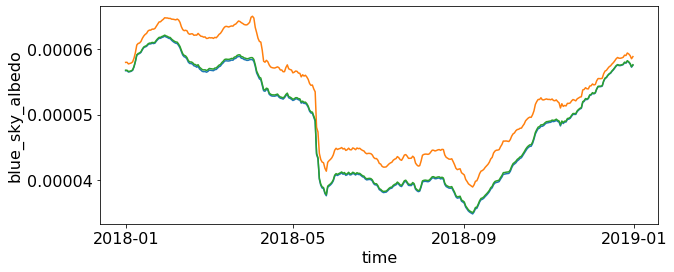

In [13]:
b1means["black_sky_albedo"].plot(figsize=(10,4))
b1means["white_sky_albedo"].plot()
b1means["blue_sky_albedo"].plot()

## b

## c

## d

## e

## f